## Exact and Parameterized Algorithms for max internal spanning tree
### Daniel Binkele-Raible, Henning Fernau, Serge Gaspers, Mathieu Liedloff

Este problema es una generalización del famoso problema del camino Hamiltoniano. En este trabajo se presenta un algoritmo basado en programación dinámica para grafos en general con grado acotado que tiene complejidad de la forma $O^*(c^n)$, con $c \leq 2$

**Notación y definiciones**


Dado un conjunto $S$, denotamos por $S_1 \cup S_2 = S$ una partición de $S$ en dos subconjuntos disjuntos. En lugar de escribir $S \mid \{v\}$, escribiremos $S-v$ para un elemento $v$. 

In [1]:
import networkx as nx
from itertools import combinations
import numpy as np

Ejemplo

In [270]:
G = nx.erdos_renyi_graph(11,0.4)

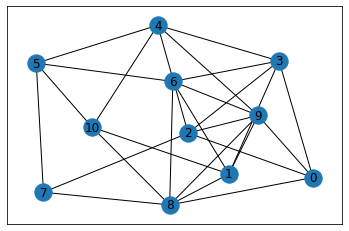

In [271]:
nx.draw_networkx(G)

Supongamos que tenemos un grafo cuyo conjunto de vértices es

In [228]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

Y el conjunto de aristas es,

In [229]:
G.edges()

EdgeView([(0, 6), (0, 8), (1, 5), (1, 6), (1, 7), (2, 6), (3, 5), (4, 7), (4, 9), (5, 6), (6, 7)])

Calcular las posibles particiones del conjunto $S$.

In [127]:
def partition(collection):
    if len(collection) == 1:
        yield [ collection ]
        return

    first = collection[0]
    for smaller in partition(collection[1:]):
        # insert `first` in each of the subpartition's subsets
        for n, subset in enumerate(smaller):
            yield smaller[:n] + [[ first ] + subset]  + smaller[n+1:]
        # put `first` in its own subset 
        yield [ [ first ] ] + smaller


#something = list(range(1,5))

#for n, p in enumerate(partition(something), 1):
    #if len(p)==2:
        #x,y = p[0] + [0], p[1] + [0]
        #print("x: ", x, "y: ", y)

In [199]:
def opt_L(S,v):
    if len(S) == 2:
        X = [x for x in S if x!=v]
        if (X[0],v) in G.edges():
            return(2)
        else:
            return(np.inf)
        
    else:
        minimo = np.inf
        N = [i for i in list(G.neighbors(0)) if i in S]
        if v in S:
            S. remove(v)

        for x in N:
            if opt_L(S,x) < minimo:
                minimo = opt_L(S,x)
    
            if opt_I(S,x) + 1 < minimo:
                minimo = opt_I(S,x) + 1
        S + [v]
        return(minimo)
        
        
        

In [214]:
def opt_I(S,v):
    if len(S) == 2:
        return(np.inf)
    
    else:
        if v in S:
            S.remove(v)
        partitions = [p for p in partition(S) if len(p) == 2]
        minimo = np.inf
        
        for i in range(len(partitions)):
            x = partitions[i][0] + [v]
            y = partitions[i][1] + [v]
    
            r_1 = opt_I(x,v) + opt_I(y,v)
            r_2 = opt_I(x,v) + opt_L(y,v) - 1
            r_3 = opt_L(x,v) + opt_L(y,v) - 2
    
            if r_1 < minimo:
                minimo = r_1

            if r_2 < minimo:
                minimo = r_2

            if r_3 < minimo:
                minimo = r_3
        S + [v]
        return(minimo)

In [272]:
S = [x for x in range(11)]

In [260]:
from time import time

In [273]:
t = time()
opti = opt_I(S,1)
optl = opt_L(S,1)
t = time() - t

In [274]:
t

1277.0472240447998